In [19]:
import torch
import numpy as np
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable
from matplotlib import pyplot as plt

In [7]:
num = np.array(([1,2,3],[4,5,6]))
tensor = torch.from_numpy(num)
tensor2num = tensor.numpy()
print(num,'\n',tensor,'\n',tensor2num)

[[1 2 3]
 [4 5 6]] 
 tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32) 
 [[1 2 3]
 [4 5 6]]


In [16]:
tensor = torch.FloatTensor([[1,2],[3,4]])
variable = Variable(tensor,requires_grad=True)
print(tensor,'\n',variable)

tensor([[1., 2.],
        [3., 4.]]) 
 tensor([[1., 2.],
        [3., 4.]], requires_grad=True)


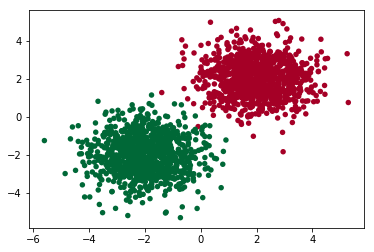

In [60]:
n_data = torch.ones(1000,2)
x0 = torch.normal(2*n_data,1)
y0 = torch.zeros(1000)
x1 = torch.normal(-2*n_data,1)
y1 = torch.ones(1000)
x = torch.cat((x0,x1
              ),0).type(torch.FloatTensor)
y = torch.cat((y0,y1),).type(torch.LongTensor)
x = Variable(x)
y = Variable(y)
plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1],c=y.data.numpy(),s=30,lw=0, cmap='RdYlGn')
plt.show()


In [61]:
net = torch.nn.Sequential(
    torch.nn.Linear(2,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,2),
)
print(net.parameters)

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=2, bias=True)
)>


0.999


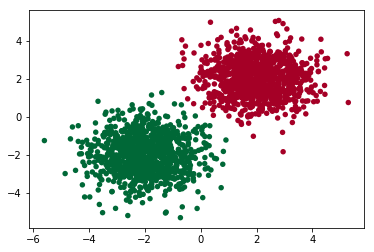

In [63]:
opt = torch.optim.SGD(net.parameters(),lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()
for i in range(1000):
    out = net(x)
    loss = loss_func(out,y)
    opt.zero_grad()
    loss.backward()
    opt.step()
predication = torch.max(F.softmax(out,dim=1),1)[1]
pred_y = predication.data.numpy()
target_y = y.data.numpy()
accuary = sum(pred_y==target_y)/2000
print(accuary)
plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1],c=pred_y,s=30,lw=0,cmap='RdYlGn')
plt.show()